In [189]:
%reset -s -f
import os
import numpy as np
import pickle
from utils import *
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 35

In [190]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [191]:
# emphasis = 'energy'
# folder_numbers = ['18','93'] # 1st plot
# fixed_number = 3

# emphasis = 'force'
# folder_numbers = ['20','94'] # 2nd plot
# fixed_number = 4

emphasis = 'stress'
folder_numbers = ['42','95'] # 3rd plot
fixed_number = 5

# plot = 'energy'
# plot = 'force'
plot = 'stress'


curves_folder = 'loss_data/'
folders_list = []
eval_losses = []
for foldername in sorted_alphanumeric(os.listdir(curves_folder)):
    if '_' in foldername and foldername[0:foldername.index('_')] in folder_numbers:        
        folders_list.append(foldername)
        curves_folder_i = os.path.join(curves_folder, foldername)

In [192]:
soft_number = folders_list[1][0:folders_list[1].index('_')]
labels = [f'Fixed #{fixed_number}', f'Softadapt']

linestyles = [(5, (10,3)), 'solid', '-', '-']

if emphasis=='energy':
    colors = ['#ff7f0e', '#1f77b4']
elif emphasis=='force':
    colors = ['#00B945', '#1f77b4']
elif emphasis=='stress':
    colors = ['#FF2C00', '#1f77b4']

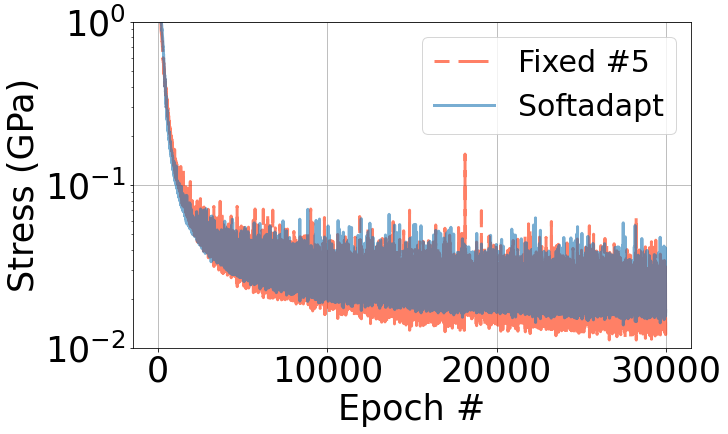

In [193]:
_,ax = plt.subplots(nrows=1, figsize=(10,6))
alpha1=0.3
alpha2= 0.6
window_size = 100
downlim = 0
uplim = 30000
lw = 3
legend_fontsize = 30
loc = 'upper right'

count = 0
for i,folder_i in enumerate(folders_list):
    for file_i in os.listdir(os.path.join(curves_folder, folder_i)):
        if 'train' in file_i:
            load_arr = np.loadtxt(os.path.join(curves_folder, folder_i, file_i))
            if 'pe' in file_i and plot=='energy':
                ax.plot(np.arange(0,len(load_arr))[downlim:uplim],
                        np.sqrt(load_arr[downlim:uplim]),
                        c=colors[count], linestyle=linestyles[count], alpha=alpha2, lw=lw, label=labels[i])
                ax.set_xlabel('Epoch #')
                ax.set_ylabel('Energy (eV/atom)', fontsize=30),
                ax.set_yscale('log')
                ax.set_ylim([1e-3,5e-1])
                ax.legend(fontsize=legend_fontsize, loc=loc)
                ax.grid(True)
                count+=1
            if 'force' in file_i and plot=='force':
    #                 ax[0].plot(load_arr[downlim:uplim], alpha=alpha1, lw=lw, label=folder_i)
                ax.plot(np.arange(0,len(load_arr))[downlim:uplim],
                        np.sqrt(load_arr[downlim:uplim]), 
                        c=colors[count], linestyle=linestyles[count], alpha=alpha2, lw=lw, label=labels[i])
                ax.set_xlabel('Epoch #')
                ax.set_ylabel('Force (eV/Å)')
                ax.set_yscale('log')
    #                 ax[0][0].set_xlim([downlim:uplim])
                ax.set_ylim([10e-3,1e-0])
                ax.legend(fontsize=legend_fontsize, loc=loc)
                ax.grid(True)
                count +=1
            if 'stress' in file_i and plot=='stress':
    #                 ax[0].plot(load_arr[downlim:uplim], alpha=alpha1, lw=lw, label=folder_i)
                ax.plot(np.arange(0,len(load_arr))[downlim:uplim],
                        np.sqrt(load_arr[downlim:uplim]),
                        linestyle=linestyles[count], 
                        c=colors[count], alpha=alpha2, lw=lw, label=labels[i])
                ax.set_xlabel('Epoch #')
                ax.set_ylabel('Stress (GPa)')
                ax.set_yscale('log')
    #                 ax[0][0].set_xlim([downlim:uplim])
                ax.set_ylim([10e-3,1e-0])
                ax.legend(fontsize=legend_fontsize, loc=loc)
                ax.grid(True)
                count +=1
# ax.indicate_inset_zoom(axins)

plt.savefig(f'loss_figures/train_curves_emph_{emphasis}_{plot}.png', dpi=300, bbox_inches='tight')
plt.show()

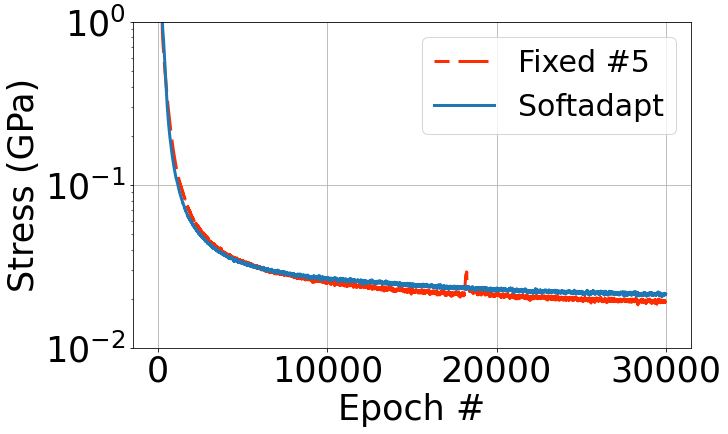

In [194]:
_,ax = plt.subplots(nrows=1, figsize=(10,6))
alpha2 = 1.

count = 0
for i,folder_i in enumerate(folders_list):
    for file_i in os.listdir(os.path.join(curves_folder, folder_i)):
        if 'train' in file_i:
            load_arr = np.loadtxt(os.path.join(curves_folder, folder_i, file_i))
            if 'pe' in file_i and plot=='energy':
                ax.plot(np.arange(1,len(load_arr))[downlim:uplim-1],
                        moving_average(np.sqrt(load_arr[downlim:uplim]), window_size),
                        c=colors[count], linestyle=linestyles[count], alpha=alpha2, lw=lw, label=labels[i])
                ax.set_xlabel('Epoch #')
                ax.set_ylabel('Energy (eV/atom)', fontsize=30),
                ax.set_yscale('log')
                ax.set_ylim([1e-3,5e-1])
                ax.legend(fontsize=legend_fontsize, loc=loc)
                ax.grid(True)
                count+=1
            if 'force' in file_i and plot=='force':
    #                 ax[0].plot(load_arr[downlim:uplim], alpha=alpha1, lw=lw, label=folder_i)
                ax.plot(np.arange(1,len(load_arr))[downlim:uplim-1],
                        moving_average(np.sqrt(load_arr[downlim:uplim]), window_size), 
                        c=colors[count], linestyle=linestyles[count], alpha=alpha2, lw=lw, label=labels[i])
                ax.set_xlabel('Epoch #')
                ax.set_ylabel('Force (eV/Å)')
                ax.set_yscale('log')
    #                 ax[0][0].set_xlim([downlim:uplim])
                ax.set_ylim([10e-3,1e-0])
                ax.legend(fontsize=legend_fontsize, loc=loc)
                ax.grid(True)
                count +=1
            if 'stress' in file_i and plot=='stress':
    #                 ax[0].plot(load_arr[downlim:uplim], alpha=alpha1, lw=lw, label=folder_i)
                ax.plot(np.arange(1,len(load_arr))[downlim:uplim-1],
                        moving_average(np.sqrt(load_arr[downlim:uplim]), window_size), linestyle=linestyles[count], 
                        c=colors[count], alpha=alpha2, lw=lw, label=labels[i])
                ax.set_xlabel('Epoch #')
                ax.set_ylabel('Stress (GPa)')
                ax.set_yscale('log')
    #                 ax[0][0].set_xlim([downlim:uplim])
                ax.set_ylim([10e-3,1e-0])
                ax.legend(fontsize=legend_fontsize, loc=loc)
                ax.grid(True)
                count +=1
# ax.indicate_inset_zoom(axins)

plt.savefig(f'loss_figures/train_curves_emph_{emphasis}_{plot}_ma.png', dpi=300, bbox_inches='tight')
plt.show()

In [195]:
emphasis, plot

('stress', 'stress')